In [54]:
from jupyterthemes import get_themes
import jupyterthemes as jt

from jupyterthemes.stylefx import set_nb_theme


set_nb_theme('gruvboxd')

## import pytorch and seting up device-agnostic code

In [55]:
import torch
from torch import nn 


# note : pytorch version 
torch.__version__

'2.0.1+cu117'

In [56]:
# setup device-agnostic 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. get data

In [57]:
import requests 
import zipfile 
from pathlib import Path 

# setup Path to a data folder 
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image folder doesn't exist , download it and preapre it... 
if image_path.is_dir():
    print(f"{image_path} directory already exists.. skipping download")
    
else:
    print(f"{image_path} does not exist , creating one..")
    image_path.mkdir(parents=True, exist_ok=True)
    
# downlaod pizza, steak and sushi data 
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)
    
    
# unizip pizza, steak, sushi data 
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)

data\pizza_steak_sushi directory already exists.. skipping download
Unzipping pizza, steak and sushi data...


## Becoming one with the data (data preparation and data exploration)

In [58]:
import os 
def walk_through_dir(dir_path):
    """walk through dir_path returning it contents.
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")
        

In [59]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'. 
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'. 
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'. 
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'. 
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'. 
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'. 
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'. 
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'. 
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'. 


In [60]:
# Setup train and testing paths 
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and image 


let's write some code to: 
1. Get all of the image paths 
2. Pick a random image path using Python's random.choice(
3. Get the image class name using 'pathlib.Path.parent.stem'
4. since we are working with image, let's opent the image with python PIL
5. we will then show the image and print metadata

data\pizza_steak_sushi\test\sushi\1987407.jpg
sushi
Random image path: data\pizza_steak_sushi\test\sushi\1987407.jpg
Image class: sushi
Image height: 384
Image width: 512


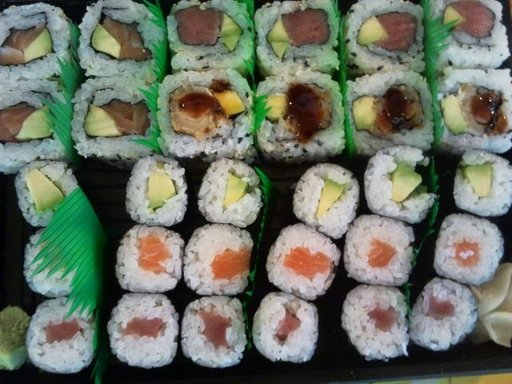

In [61]:
import random 
from PIL import Image 

# set seed 
# random.seed(42)

# 1. get all image paths 
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get Image class from path name (the image class is the name of the directory where the)
image_class = random_image_path.parent.stem
print(image_class)


# 4. open image 
img = Image.open(random_image_path)

# 5. print metadata 
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

img


(-0.5, 511.5, 383.5, -0.5)

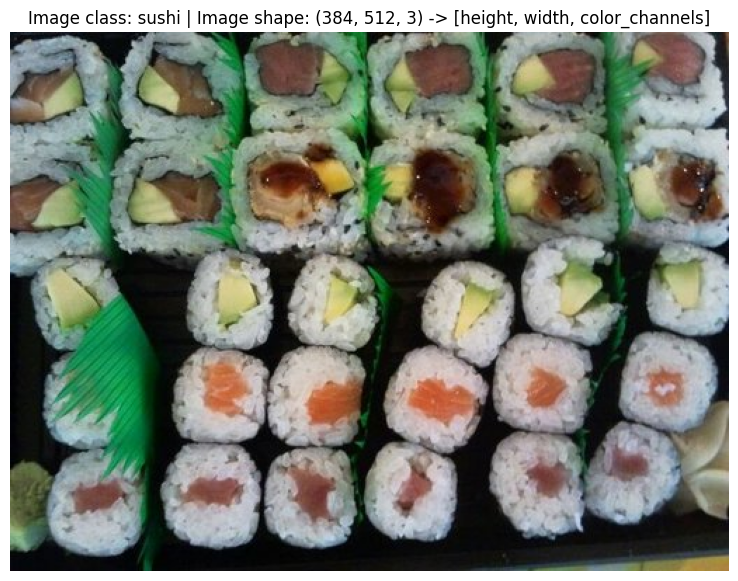

In [62]:
import numpy as np 
import matplotlib.pyplot as plt 

# turn the image into an array 
img_as_array = np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis("off")

### 3. Transform data 

Before we can use our image data with Pytorch:
1. Turn your target data into tensors (in our case, numerical representation of our images)
2. Turn it into a torch.utils.data.Dataset and subsequently a torch.utils.data.DataLoader , we will call these 
    dataset and Dataloader

In [63]:
import torch
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms 

####  3.1 Transforming data with trochvision.transform

In [64]:
# write a transform for image 
data_transform = transforms.Compose([
    
    # Resize our images to 64x64
    transforms.Resize(size=(512,512)),
    # flip the images randomly on the horizontal 
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor 
    transforms.ToTensor()
    
])

In [65]:
data_transform(img)

tensor([[[0.4784, 0.4275, 0.3176,  ..., 0.0353, 0.0078, 0.0353],
         [0.5098, 0.4392, 0.3137,  ..., 0.0431, 0.0118, 0.0471],
         [0.5255, 0.4392, 0.3020,  ..., 0.0471, 0.0275, 0.0431],
         ...,
         [0.6784, 0.6824, 0.6784,  ..., 0.0275, 0.0353, 0.0431],
         [0.6745, 0.6784, 0.6745,  ..., 0.0314, 0.0392, 0.0471],
         [0.6667, 0.6745, 0.6706,  ..., 0.0353, 0.0431, 0.0471]],

        [[0.3529, 0.3059, 0.2275,  ..., 0.0745, 0.0588, 0.0863],
         [0.3843, 0.3216, 0.2235,  ..., 0.0784, 0.0588, 0.0902],
         [0.4000, 0.3255, 0.2118,  ..., 0.0824, 0.0706, 0.0784],
         ...,
         [0.5098, 0.5137, 0.5176,  ..., 0.0157, 0.0235, 0.0275],
         [0.5020, 0.5059, 0.5176,  ..., 0.0157, 0.0235, 0.0275],
         [0.4941, 0.5020, 0.5137,  ..., 0.0157, 0.0235, 0.0275]],

        [[0.2627, 0.2275, 0.1647,  ..., 0.1098, 0.0902, 0.1176],
         [0.2941, 0.2431, 0.1608,  ..., 0.1098, 0.0863, 0.1216],
         [0.3137, 0.2471, 0.1529,  ..., 0.1059, 0.0902, 0.

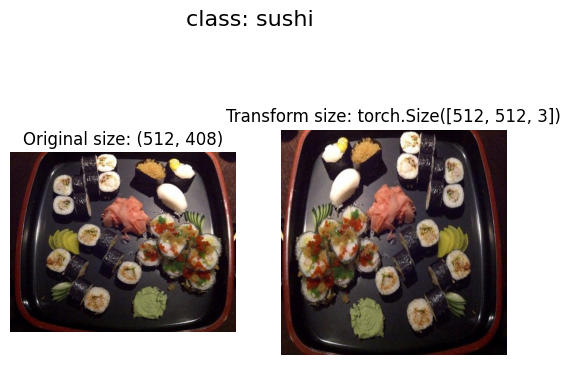

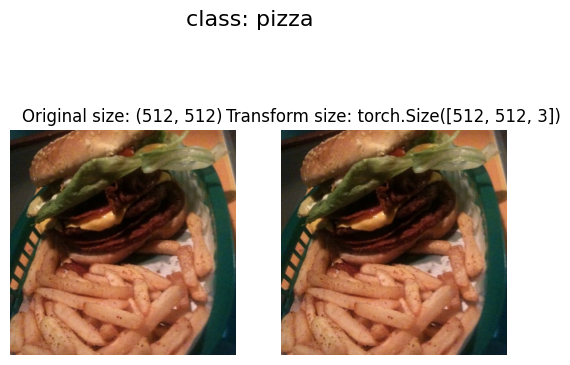

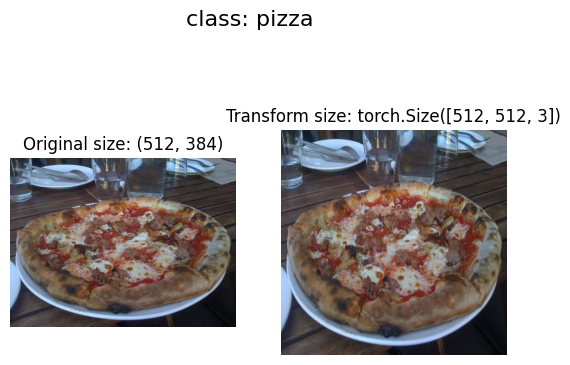

In [66]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    """select random images from a path of images and loads/transforms
    them then plots the original vs the transformed version.
    """
    
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original size: {f.size}")
            ax[0].axis(False)
            
            
        # transform and plot target image 
        transformed_image = transform(f).permute(1,2,0)  # (c,H,W) -> (H,W,C)
        ax[1].imshow(transformed_image)
        ax[1].set_title(f"Transform size: {transformed_image.shape}")
        ax[1].axis(False)
        
        fig.suptitle(f"class: {image_path.parent.stem}", fontsize=16)
        
plot_transformed_images(image_paths=image_path_list,
                       transform=data_transform,
                       n=3,
                       seed=42)

In [67]:
image_path_list

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jp

## 4. Option 1: Loading image dat using ImageFolder 

we can load image classification data using 'torchvision.datasets.ImageFolder'


In [68]:
# use ImageFolder to create datasets 
from torchvision import datasets 


train_data = datasets.ImageFolder(root=train_dir,
                                transform=data_transform,  # a transform for the data 
                                target_transform=None)   


test_data = datasets.ImageFolder(root=test_dir,
                                transform=data_transform)


train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [69]:
# Get class names as list 
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [70]:
# get class name as dict 
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [71]:
# check the length of our datasets
len(train_data), len(test_data)

(225, 75)

In [72]:
train_data.samples[0]

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [73]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [74]:
# Index on the train_data DataSet to get a single image and label 
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor: 
 tensor([[[0.1020, 0.1059, 0.1059,  ..., 0.1137, 0.1098, 0.1098],
         [0.1098, 0.1098, 0.1098,  ..., 0.1098, 0.1137, 0.1176],
         [0.1137, 0.1137, 0.1137,  ..., 0.1098, 0.1176, 0.1216],
         ...,
         [0.1569, 0.1608, 0.1647,  ..., 0.0902, 0.0863, 0.0863],
         [0.1529, 0.1451, 0.1490,  ..., 0.0863, 0.0863, 0.0824],
         [0.1647, 0.1451, 0.1412,  ..., 0.0824, 0.0824, 0.0863]],

        [[0.0471, 0.0510, 0.0510,  ..., 0.0706, 0.0667, 0.0667],
         [0.0549, 0.0549, 0.0549,  ..., 0.0667, 0.0706, 0.0745],
         [0.0588, 0.0588, 0.0588,  ..., 0.0667, 0.0745, 0.0784],
         ...,
         [0.2196, 0.2235, 0.2275,  ..., 0.1059, 0.1020, 0.1020],
         [0.2235, 0.2157, 0.2196,  ..., 0.1020, 0.1020, 0.0980],
         [0.2353, 0.2157, 0.2118,  ..., 0.0980, 0.0980, 0.1020]],

        [[0.0118, 0.0157, 0.0157,  ..., 0.0941, 0.0902, 0.0902],
         [0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0941, 0.0980],
         [0.0235, 0.0235, 0.0235,  ..., 0.

original shape: torch.Size([3, 512, 512])
Image permute shape: torch.Size([512, 512, 3])


Text(0.5, 1.0, 'pizza')

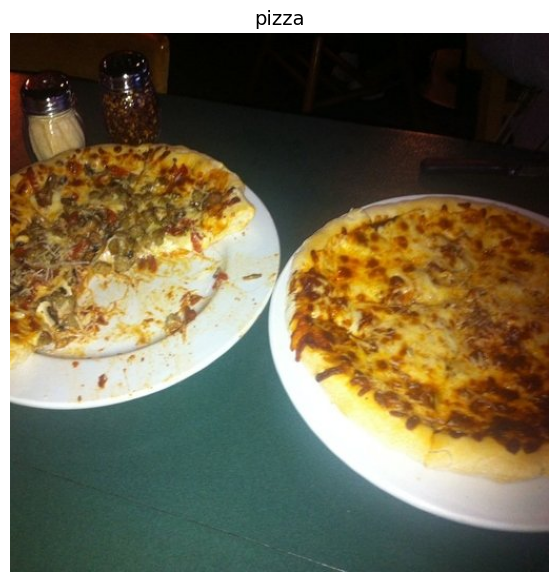

In [75]:
# Rearrange the order of dimensions 
img_permute = img.permute(1,2,0)

# print out different shapes (before and after permute)
print(f"original shape: {img.shape}")
print(f"Image permute shape: {img_permute.shape}")

# plot the image 
plt.figure(figsize=(10,7))
plt.imshow(img.permute(1,2,0))
plt.axis("off")
plt.title(class_names[label], fontsize=14)

### 4.1 Turn loaded images into DataLoader's 

In [76]:
# turn train and test datasets into DataLoaders 
from torch.utils.data import DataLoader 
import os 

Batch_size=32
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = Batch_size, 
                             num_workers = os.cpu_count(),
                             shuffle=True)


test_dataloader = DataLoader(dataset = test_data,
                           batch_size=Batch_size,
                           num_workers=os.cpu_count())

In [77]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [78]:
img, label =  next(iter(train_dataloader))

# Batch size will now be 1 you can change the batch size if you like 
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 512, 512]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


## 5 option 2: Loading Image data with Custom Dataset 

1. want to be able to load images from file 
2. want to be able to get class names from the dataset 
3. want to be able to get classes as dictionary from the dataset 

Pros:
* can create a Dataset out of almost anything
* Not limited to Pytorch pre-built 'dataset' functions 

Cons:
* Even through you could create Dataset out of almost anything, it doesn't mean it will work...
* Using a custom Dataset often results in us writing more code, which could be prone to errors or performance issues

In [79]:
import os 
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset 
from torchvision import transforms
from typing import Tuple, Dict, List 

In [80]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 creating a helper function to get class names 

we want to function to:
    
1. Get the class names using 'os.scandir()' to transverse a target directory(ideally the directory is in standard image classification format)
2. Raise an error of the class name are not found (if this happens , there might be something wrong with the directory sturecture).
3. Turn the class names into a dict and a list and return them.



In [81]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data\pizza_steak_sushi\train
Class names found: ['pizza', 'steak', 'sushi']


In [82]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Crearte a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [83]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom 'Dataset' to replicate 'ImageFolder'


To create our own custom dataset, we want to:
    
1. Subclass torch.utils.data.Dataset
2. Init our subclass with a target directiory (the directory we had like to get data from) as well as a 
3. create several attributes:
    * paths - paths of our images 
    * transform - the transform we had like to use
    * classes - a list of the target classes 
    * class_to_idx - a dict of the target classes mapped to integer labels 
    
4. Create a function to load_images(), this function will open an image 
5. Overwrite the __len()__ method to return the length of our dataset
6. Overwrite the __getitem()__ method to return a give sample when passed an index 


    


In [84]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)
    
    
    

In [85]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [86]:

train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)
train_data_custom, test_data_custom




(<__main__.ImageFolderCustom at 0x227d5d604c0>,
 <__main__.ImageFolderCustom at 0x227d5e77400>)

In [87]:
len(train_data), len(train_data_custom)

(225, 225)

In [88]:
len(test_data_custom), len(test_data)

(75, 75)

In [89]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [90]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [91]:
# check for equality b/w original Imagefolder and Imagefolder Custom dataset 
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


### 5.3 Create a function random images 


1. Take in a 'Dataset' and a number of other parameters such as class names and how many images to visualize.
2. To parevent the display getting of hand, let's cap the number of images to see at 10.
3. set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot 
6. Loop through the random sample images and plot them with matplotlib.
7. make sure the dimensions of our image line up with matplotlib


In [92]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

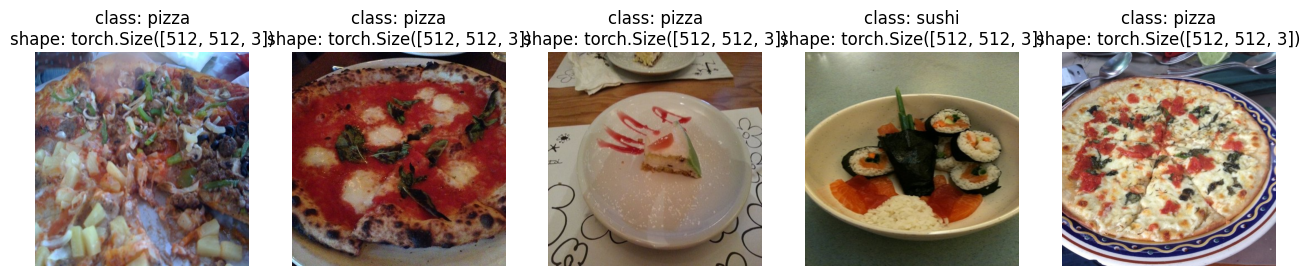

In [93]:
display_random_images(train_data,
                     n=5,
                     classes=class_names,
                     seed=None)

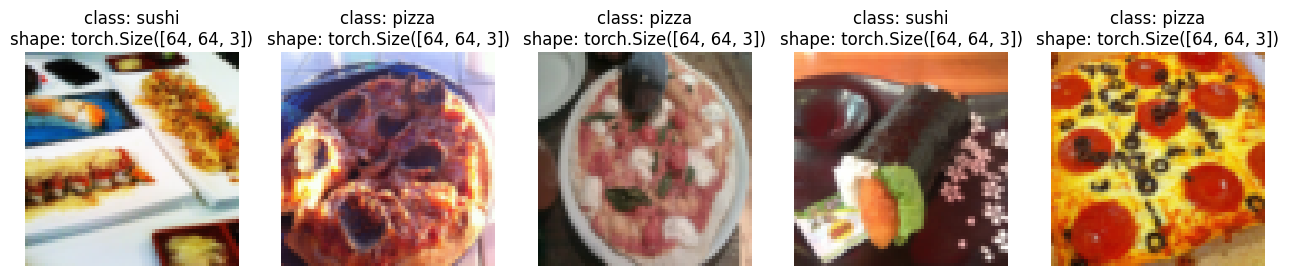

In [94]:
# Display random images from the ImageFolderCustom dataset 
display_random_images(train_data_custom,
                     n=5,
                     classes=class_names,
                     seed=42)

### 5.4 Turn custom loaded images into dataloader

In [95]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x227cd754640>,
 <torch.utils.data.dataloader.DataLoader at 0x227c9b117c0>)

In [96]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 6. Other forms of transforms (data augmentation)

In [97]:
from torchvision import transforms 

train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

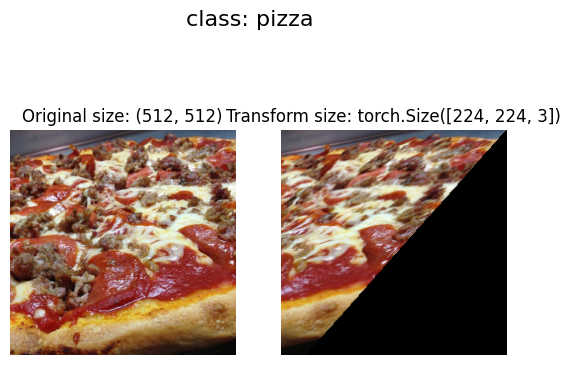

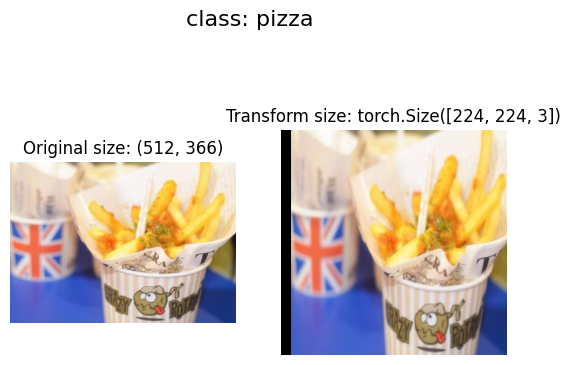

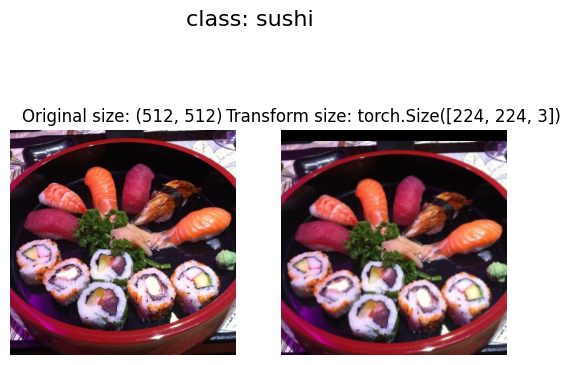

In [98]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

## 7. Model 0 : TinyVGG without data augmentation 

In [99]:
# Create simple transform
simple_transform = transforms.Compose([ 
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [100]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 20 workers.


(<torch.utils.data.dataloader.DataLoader at 0x227cd64e130>,
 <torch.utils.data.dataloader.DataLoader at 0x227ce972ca0>)

### 7.2 Create TinyVGG model class 

In [101]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### 7.3 Try a forwad pass on a single image (to test the model)

In [104]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0637, 0.0615, 0.0382]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3364, 0.3357, 0.3279]], device='cuda:0')

Output prediction label:
tensor([0], device='cuda:0')

Actual label:
1


In [106]:
# Try a forward pass 
model_0(img_batch.to(device))

tensor([[0.0637, 0.0615, 0.0382],
        [0.0598, 0.0601, 0.0385],
        [0.0661, 0.0620, 0.0389],
        [0.0679, 0.0707, 0.0401],
        [0.0657, 0.0643, 0.0402],
        [0.0557, 0.0571, 0.0356],
        [0.0611, 0.0600, 0.0372],
        [0.0740, 0.0676, 0.0400],
        [0.0660, 0.0652, 0.0366],
        [0.0603, 0.0623, 0.0397],
        [0.0623, 0.0627, 0.0368],
        [0.0576, 0.0614, 0.0391],
        [0.0674, 0.0616, 0.0385],
        [0.0639, 0.0597, 0.0395],
        [0.0702, 0.0663, 0.0405],
        [0.0621, 0.0613, 0.0361],
        [0.0690, 0.0665, 0.0397],
        [0.0733, 0.0687, 0.0412],
        [0.0565, 0.0611, 0.0366],
        [0.0630, 0.0564, 0.0428],
        [0.0613, 0.0612, 0.0382],
        [0.0644, 0.0620, 0.0405],
        [0.0642, 0.0620, 0.0386],
        [0.0609, 0.0612, 0.0382],
        [0.0614, 0.0590, 0.0377],
        [0.0579, 0.0600, 0.0380],
        [0.0689, 0.0647, 0.0378],
        [0.0584, 0.0609, 0.0384],
        [0.0624, 0.0603, 0.0378],
        [0.067

#### 7.4 Use torchinfo to get an idea of the shapes going through our model 

In [107]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## 7.5 create train and test loops functions 

* train_step - takes in a model and dataloader and trains the model on dataloader
* test_step - takes in a model and dataloader and evaluates the model on the dataloader 

In [108]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [109]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 7.6 create a train function to combine train_step and test_step

In [110]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

### 7.7 Train and evaluate model 0 

In [111]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1621 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1155 | train_acc: 0.2930 | test_loss: 1.1701 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0980 | train_acc: 0.4141 | test_loss: 1.1357 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.1428 | test_acc: 0.1979
Total training time: 44.593 seconds


### 7.8 plot the loss curves of Model 0 

A los curvers is way of tracking your model preogress over time 

In [112]:
# get the model_0_results keys 

model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [113]:
def plot_loss_curves(results:Dict[str,List[float]]):
    
    "Plots training curves of results dictionary"
    # get the loss values of the results dictionary (training and test)
    loss = results["train_loss"]
    test_loss = results["test_loss"]
    
    # get the accuracy values of the results dictionary (training and test)
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]
    
    
    # Figure out how many epochs there were 
    epochs = range(len(results["train_loss"]))
    
    # setup a plot 
    plt.figure(figsize=(15,7))
    
    # plot the loss 
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    
    # plot the accuracy 
    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()
    
    

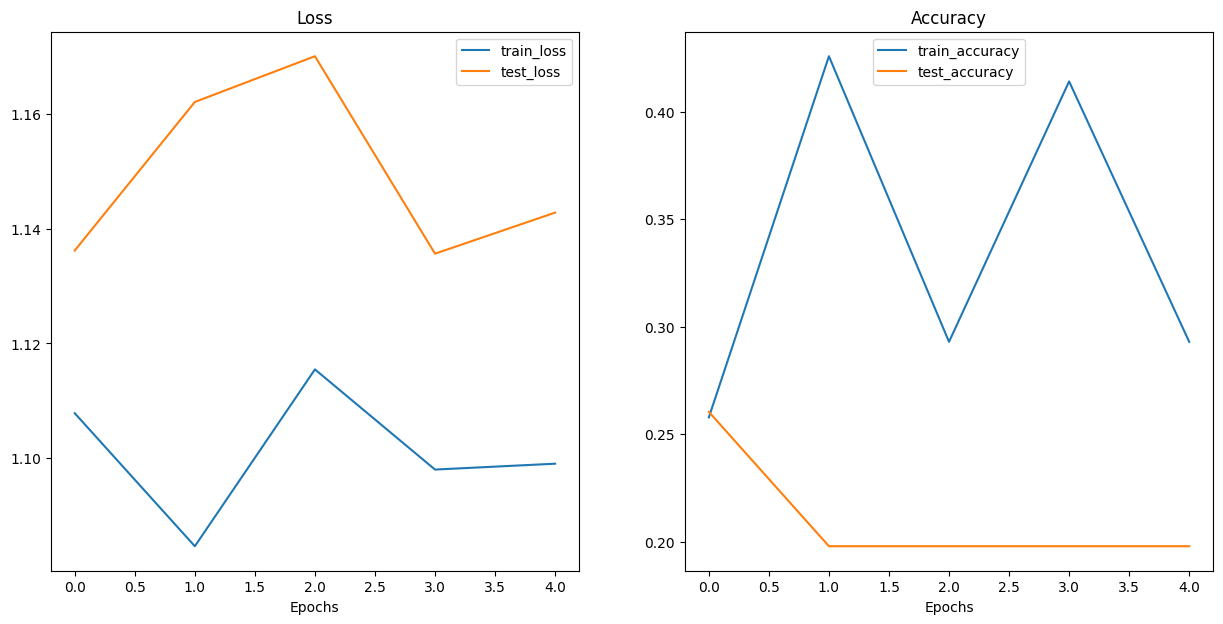

In [114]:
plot_loss_curves(model_0_results)

## 9. Model 1: Tiny VGG with Data Augmentation

NOw let's try another modelling experiment this time using the same model as before with some slight data 
augmentation.

#### 9.1 create transform with data augmentation 

In [115]:
# create training transform with TriviailAugment

from torchvision import transforms
train_trainsform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

### 9.2 Create train and test Dataset and Dataloader with data Augmentation 

In [116]:
# Turn image folders into Datasets 
from torchvision import datasets


train_data_augmented = datasets.ImageFolder(
    root=train_dir,
    transform=train_trainsform_trivial,

)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                       transform=test_transform_simple)

In [117]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x227c98912b0>,
 <torch.utils.data.dataloader.DataLoader at 0x227cdb01dc0>)

In [118]:
os.cpu_count()

20

In [119]:
device

'cuda'

### 9.3 Construct and train Model 1



In [120]:
# create model_1 and send it to the target device 

torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [121]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1074 | train_acc: 0.2500 | test_loss: 1.1058 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0790 | train_acc: 0.4258 | test_loss: 1.1384 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0801 | train_acc: 0.4258 | test_loss: 1.1696 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1287 | train_acc: 0.3047 | test_loss: 1.1622 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0885 | train_acc: 0.4258 | test_loss: 1.1479 | test_acc: 0.2604
Total training time: 43.151 seconds


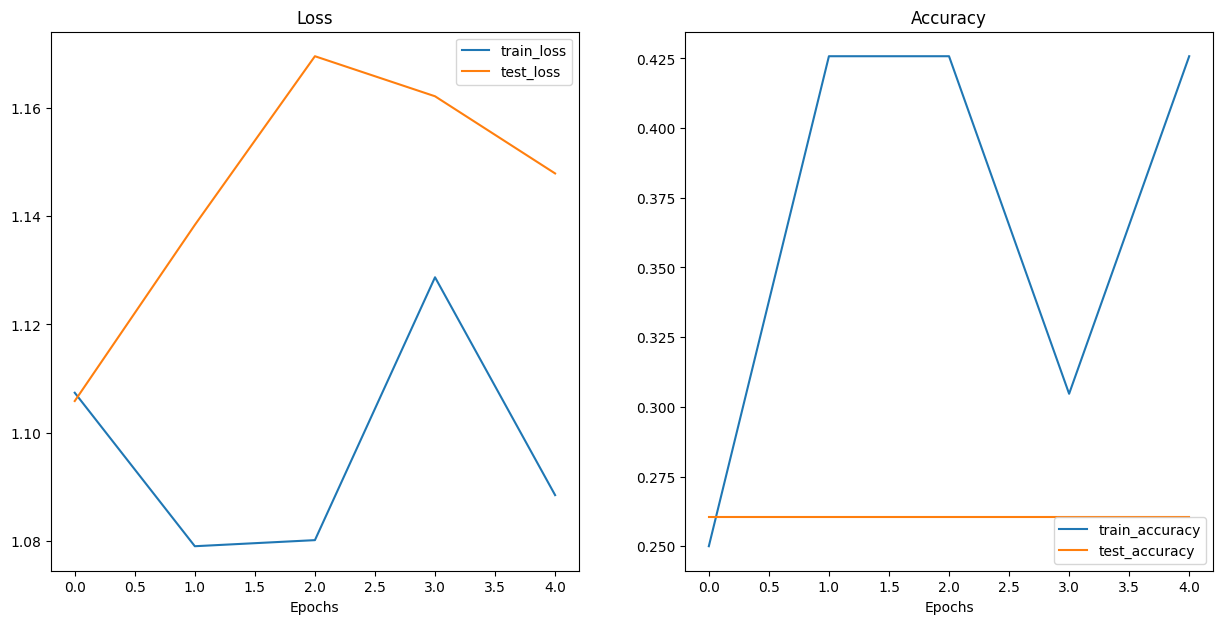

In [122]:
plot_loss_curves(model_1_results)

In [123]:
model_1_results

{'train_loss': [1.1073793917894363,
  1.0790018662810326,
  1.0801268368959427,
  1.1287284642457962,
  1.0884506180882454],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.42578125],
 'test_loss': [1.1058478752772014,
  1.138404409090678,
  1.1695980628331502,
  1.162192940711975,
  1.1479254563649495],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667]}

In [124]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.107839   0.257812   1.136214  0.260417
1    1.084639   0.425781   1.162126  0.197917
2    1.115479   0.292969   1.170106  0.197917
3    1.098009   0.414062   1.135666  0.197917
4    1.099032   0.292969   1.142828  0.197917

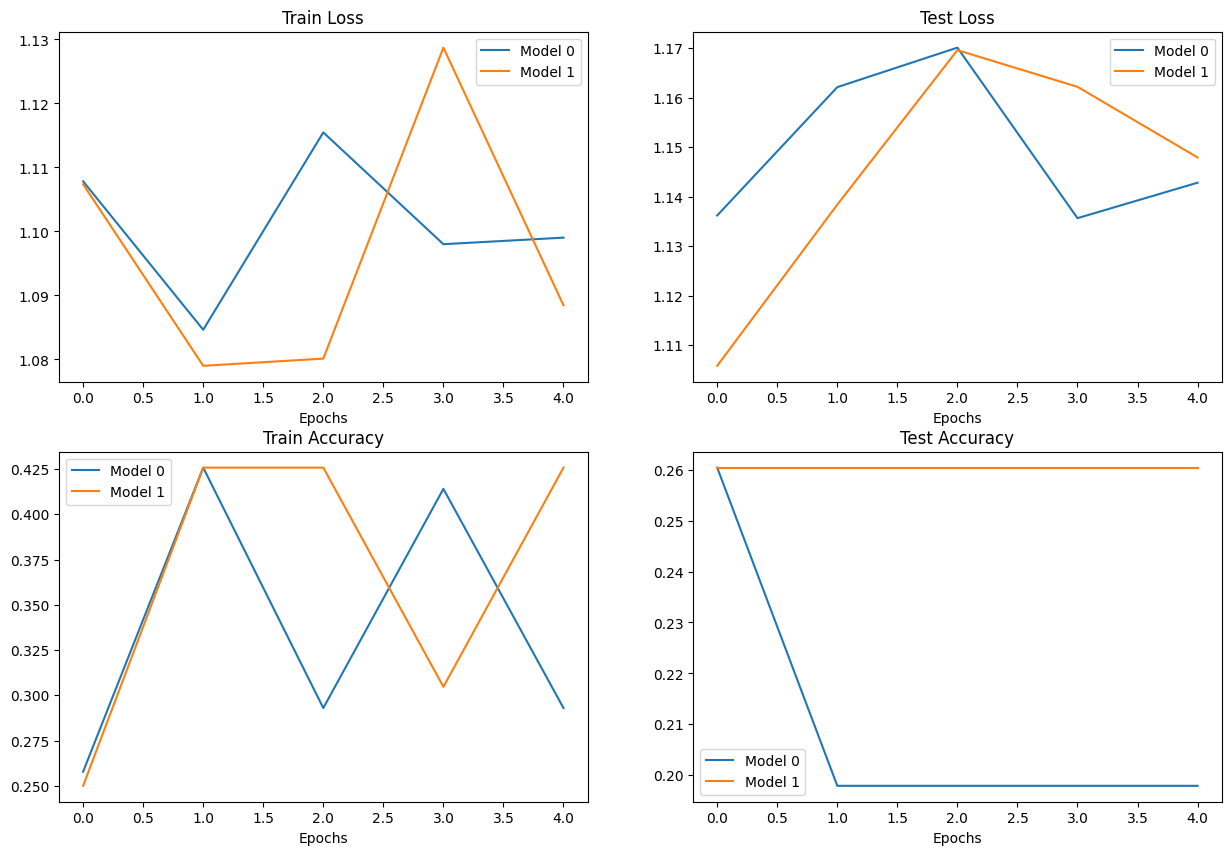

In [125]:
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

## 11. Making a prediction on a custom image 

Althrough we have trained a model on custom data... how do you make a prediction on a sample/image that is not in either 
or testing dataset.

In [126]:
# Download custom image 
import requests 

# setup custom image path 
custom_image_path  = data_path / "04-pizza-dad.jpeg"

# Download the image if doesn't already exists 
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        
        # when downloading from github , need to use the row file link 
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}....")
        f.write(request.content)
        
else:
    print(f"{custom_image_path} already exists, skipping")

data\04-pizza-dad.jpeg already exists, skipping


### 11.1 Loading in a custom image with PyTorch

we have to make sure our custom image is in the same format as the data our model was trained on. 

* In tensor form with datatype (torch.float32)
* of shape 64x64x64
* on the right device 



In [129]:
import torchvision 

# Read in custom image 
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8

tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

In [128]:
custom_image_path

WindowsPath('data/04-pizza-dad.jpeg')

(-0.5, 3023.5, 4031.5, -0.5)

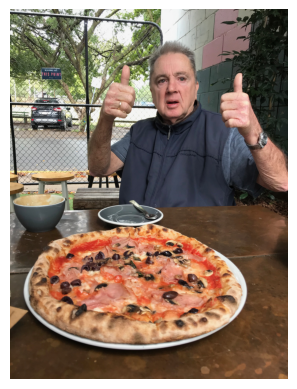

In [132]:
plt.imshow(custom_image_uint8.permute(1,2,0))
plt.axis(False)

In [134]:
print(f"custom image tensor: \n {custom_image_uint8}")
print(f"custom image shape: \n {custom_image_uint8.shape}")
print(f"custom image datatype: {custom_image_uint8.dtype}")

custom image tensor: 
 tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
custom image shape: 
 torch.Size([3, 4032, 3024])
custom image d

## 11.2 Making a prediction on a custom image with a PyTorch model

In [135]:
# Try to make a prediction on an image in unit8 format 
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [141]:
# Load in the custom image and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image.shape

torch.Size([3, 4032, 3024])

In [138]:
 # this will error : image not on right device
# Try to make a prediction on an image in unit8 format 
model_1.eval()
with torch.inference_mode():
    model_1(custom_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x762048 and 2560x3)

In [140]:
img.shape

torch.Size([32, 3, 512, 512])

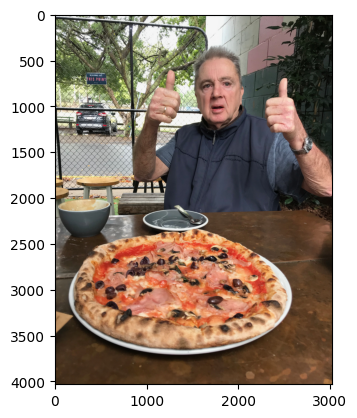

In [142]:
plt.imshow(custom_image.permute(1,2,0))

In [147]:
# Create transform pipeline to resize image 
from torchvision import transforms

custom_image_transform  = transforms.Compose([
    transforms.Resize(size=(64,64))
])

# transform target image 
custom_image_transformed = custom_image_transform(custom_image)

# print out the shape 
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")


Original shape: torch.Size([3, 4032, 3024])
Transformed shape: torch.Size([3, 64, 64])


In [146]:
custom_image.shape

torch.Size([3, 4032, 3024])

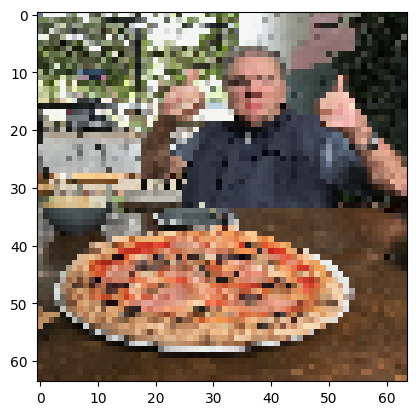

In [148]:
plt.imshow(custom_image_transformed.permute(1,2,0))

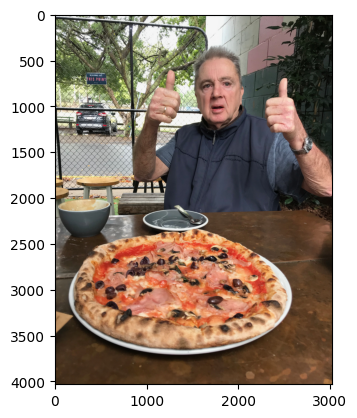

In [149]:
plt.imshow(custom_image.permute(1,2,0))

In [152]:

# this will error no batch size 
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

In [154]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [156]:

# this will error no batch size 
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
    
custom_image_pred

tensor([[ 0.1148,  0.0253, -0.1399]], device='cuda:0')

Note, to make a prediction on a custom image we had to:
* Load the image and turn it into a tensor
* Make sure the image was the same datatye as the model(torch.float32)
* Make sure the image was the same shape as the data the model was trained on (3,64,64) with a batch size.. (1,3,64,64)
* Make sure the image was on the same device as our model 

In [158]:
# Convert logits -> prediction probabilites
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3718, 0.3400, 0.2882]], device='cuda:0')

In [163]:
# Convert prediction probabilites -> prediction labels 
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1).cpu()
custom_image_pred_labels

tensor([0])

In [164]:
class_names[custom_image_pred_labels]

'pizza'

### 11.3 Putting custom image prediction together: building a function 

Ideal outcome:
    
A function where we pass an image path to and have our model predict on that image and plot the image + prediction

In [166]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

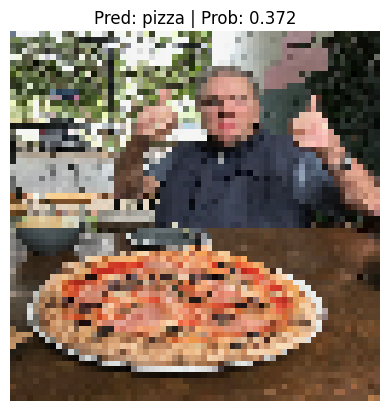

In [167]:
# prd on our cutom image 
pred_and_plot_image(model=model_1,
                   image_path=custom_image_path,
                   class_names = class_names,
                   transform=custom_image_transform,
                   device=device)